# Harris corner detector
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_08_features/harris.ipynb)



In [1]:
# to run in google colab
import sys
if 'google.colab' in sys.modules:
    import subprocess 
    subprocess.call('apt-get install subversion'.split())
    subprocess.call('svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_08_features/chess.jpg'.split())




In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


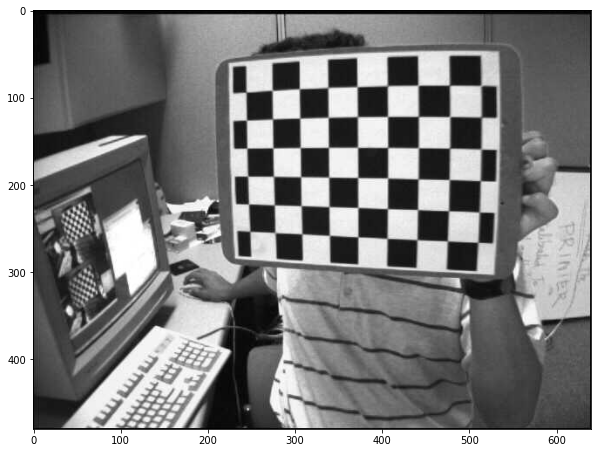

In [3]:

imgBGR = cv2.imread("chess.jpg")
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY).astype(float)/255

plt.figure(figsize=(10, 10))
plt.imshow(imgRGB)
plt.show()


## harris- step by step


In [4]:
#derivatives in x and y dirs
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Ix = cv2.filter2D(img, -1, kernel_x)

kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
Iy = cv2.filter2D(img, -1, kernel_y)

window_size = 3
offset = int(np.floor(window_size/2))

l_max = np.zeros(img.shape)
l_min = np.zeros(img.shape)
det = np.zeros(img.shape)
trace = np.zeros(img.shape)

# for each window in image
for y in range(offset, img.shape[0]-offset):
    for x in range(offset, img.shape[1]-offset):
        
        # build window of intersting data 
        windowIx = Ix[y-offset:y+offset+1, x-offset:x+offset+1]
        windowIy = Iy[y-offset:y+offset+1, x-offset:x+offset+1]

        # this is added to be consistent with PCA
        # windowIx = windowIx-np.mean(windowIx)
        # windowIy = windowIy-np.mean(windowIy)

        # build second moments matrix
        Sxx = np.sum(windowIx*windowIx)
        Syy = np.sum(windowIy*windowIy)
        Sxy = np.sum(windowIx*windowIy)

        # eigendecomposition data
        H = np.array([[Sxx, Sxy],
                [Sxy, Syy]])
        L, V = np.linalg.eig(H)

        l_max[y,x] = np.maximum(L[0],L[1])
        l_min[y,x] = np.minimum(L[0],L[1])


        det[y, x] = (Sxx * Syy) - (Sxy**2)
        trace[y, x] = Sxx + Syy





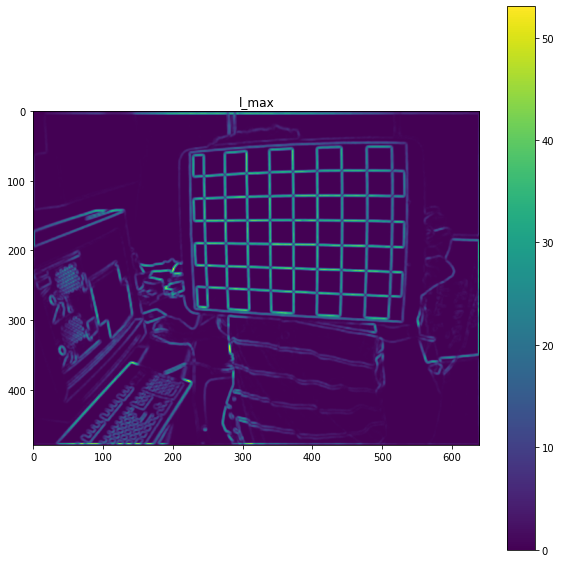

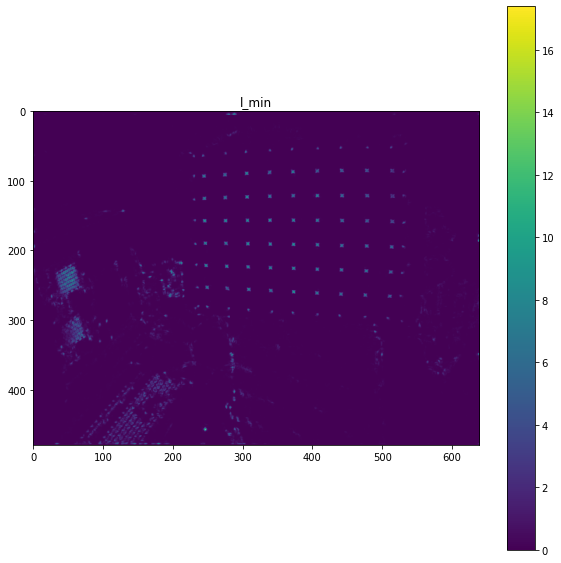

In [5]:
plt.figure(figsize=(10, 10))
plt.imshow(l_max)
plt.colorbar()
plt.title("l_max")
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(l_min)
plt.colorbar()
plt.title("l_min")
plt.show()



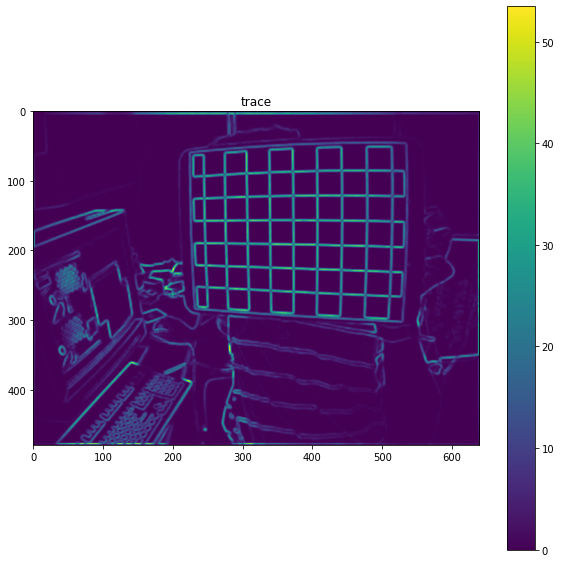

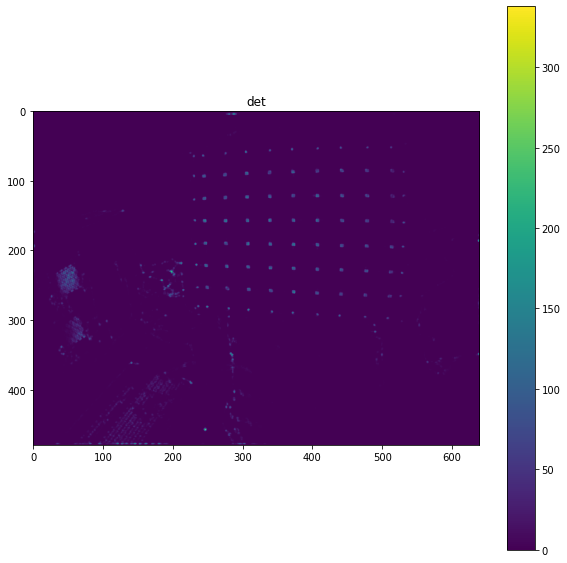

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(trace)
plt.colorbar()
plt.title("trace")
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(det)
plt.colorbar()
plt.title("det")
plt.show()




<ipython-input-1-5258b008e384>:1: RuntimeWarning: invalid value encountered in true_divide
  harris = det/trace


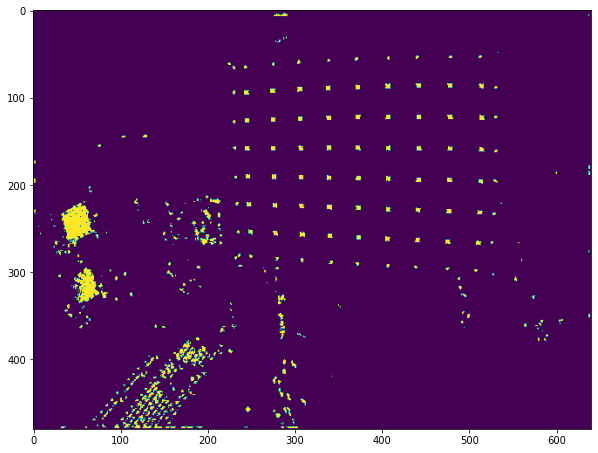

In [7]:
harris = det/trace
harris[np.isnan(harris)] = 0

plt.figure(figsize=(10, 10))
plt.imshow(harris > harris.max()/10)
plt.show()



## harris- cv2 implementation


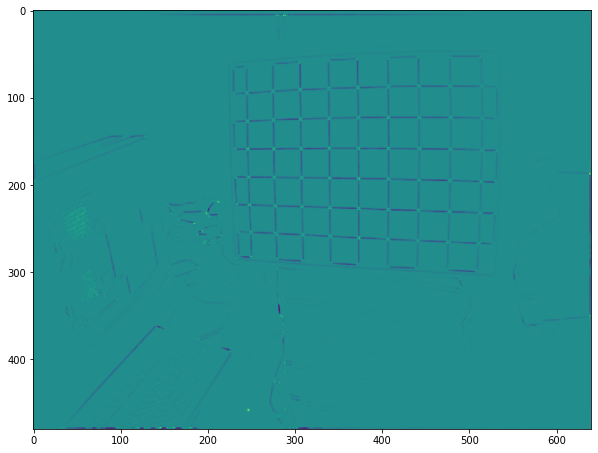

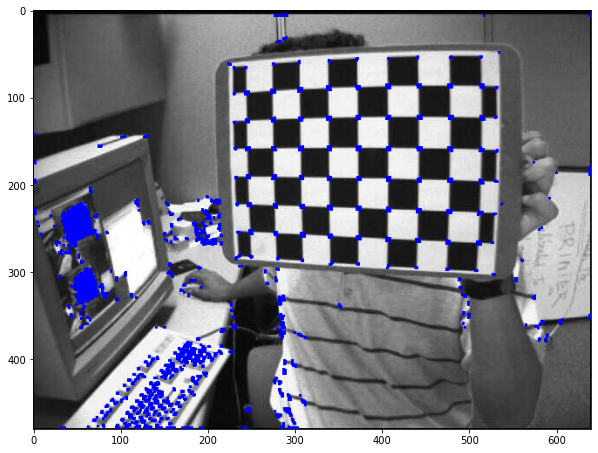

In [8]:

gray = np.float32(img)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

plt.figure(figsize=(10, 10))
plt.imshow(dst)
plt.show()

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)
# Threshold for an optimal value, it may vary depending on the image.
imgRGB[dst > 0.01*dst.max()] = [0, 0, 255]

plt.figure(figsize=(10, 10))
plt.imshow(imgRGB)
plt.show()

